# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    ## Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       # pprint.pprint(city_weather)
    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['weather'][0]['description']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Weather Description": city_date}) 

    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
    #    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | amahai
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | ahau
City not found. Skipping...
Processing Record 11 of Set 1 | richards bay
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | nantucket
Processing Record 14 of Set 1 | kone
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | northam
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | lata
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of Set 1

Processing Record 43 of Set 4 | akjoujt
Processing Record 44 of Set 4 | bubaque
Processing Record 45 of Set 4 | nova sintra
Processing Record 46 of Set 4 | zhalantun
Processing Record 47 of Set 4 | iskateley
Processing Record 48 of Set 4 | murun-kuren
Processing Record 49 of Set 4 | egilsstadir
Processing Record 0 of Set 5 | praia da vitoria
Processing Record 1 of Set 5 | whakatane
Processing Record 2 of Set 5 | remire-montjoly
Processing Record 3 of Set 5 | erumaippatti
Processing Record 4 of Set 5 | krasnoturansk
Processing Record 5 of Set 5 | shaowu
Processing Record 6 of Set 5 | douglas
Processing Record 7 of Set 5 | altamira
Processing Record 8 of Set 5 | port shepstone
Processing Record 9 of Set 5 | kaka
Processing Record 10 of Set 5 | krasnyy chikoy
Processing Record 11 of Set 5 | lihue
Processing Record 12 of Set 5 | tazovsky
Processing Record 13 of Set 5 | saipan
Processing Record 14 of Set 5 | dodola
Processing Record 15 of Set 5 | fukuecho
Processing Record 16 of Set 5 | top

Processing Record 33 of Set 8 | atbara
Processing Record 34 of Set 8 | kailua-kona
Processing Record 35 of Set 8 | yorkton
Processing Record 36 of Set 8 | tongchuanshi
Processing Record 37 of Set 8 | kosh-agach
Processing Record 38 of Set 8 | port blair
Processing Record 39 of Set 8 | thohoyandou
Processing Record 40 of Set 8 | craig
Processing Record 41 of Set 8 | pacific grove
Processing Record 42 of Set 8 | kapuskasing
Processing Record 43 of Set 8 | san luis
Processing Record 44 of Set 8 | illizi
Processing Record 45 of Set 8 | zinjibar
Processing Record 46 of Set 8 | bhawana
Processing Record 47 of Set 8 | rayon
Processing Record 48 of Set 8 | ninh binh
Processing Record 49 of Set 8 | floro
Processing Record 0 of Set 9 | uelsen
Processing Record 1 of Set 9 | baukau
Processing Record 2 of Set 9 | sola
Processing Record 3 of Set 9 | kerikeri
Processing Record 4 of Set 9 | puerto escondido
Processing Record 5 of Set 9 | najaf
Processing Record 6 of Set 9 | malvan
Processing Record 7 

Processing Record 26 of Set 12 | conduaga
Processing Record 27 of Set 12 | cuamba
Processing Record 28 of Set 12 | nishinoomote
Processing Record 29 of Set 12 | zhanaozen
Processing Record 30 of Set 12 | preobrazheniye
Processing Record 31 of Set 12 | siwa oasis
Processing Record 32 of Set 12 | az zuwaytinah
Processing Record 33 of Set 12 | uusikaupunki
Processing Record 34 of Set 12 | axim
Processing Record 35 of Set 12 | sittwe
Processing Record 36 of Set 12 | jacobina
Processing Record 37 of Set 12 | ngereklmadel
Processing Record 38 of Set 12 | oualidia
City not found. Skipping...
Processing Record 39 of Set 12 | kokopo
Processing Record 40 of Set 12 | karangampel
Processing Record 41 of Set 12 | bardai
Processing Record 42 of Set 12 | tanggu
Processing Record 43 of Set 12 | east ballina
Processing Record 44 of Set 12 | mhamid
Processing Record 45 of Set 12 | mudukulattur
Processing Record 46 of Set 12 | sorong
Processing Record 47 of Set 12 | ardestan
Processing Record 48 of Set 1

In [4]:
## Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                   582
Lat                    582
Lng                    582
Max Temp               582
Humidity               582
Cloudiness             582
Wind Speed             582
Country                582
Weather Description    582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Weather Description
0,west island,-12.1568,96.8225,26.99,74,40,4.63,CC,scattered clouds
1,port elizabeth,-33.9180,25.5701,16.29,94,75,0.00,ZA,broken clouds
2,edinburgh of the seven seas,-37.0676,-12.3116,13.09,69,91,5.56,SH,overcast clouds
3,puerto natales,-51.7236,-72.4875,7.22,91,100,1.40,CL,light rain
4,papatowai,-46.5619,169.4708,13.14,86,91,8.91,NZ,overcast clouds


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Weather Description
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,74,40,4.63,CC,scattered clouds
1,port elizabeth,-33.9180,25.5701,16.29,94,75,0.00,ZA,broken clouds
2,edinburgh of the seven seas,-37.0676,-12.3116,13.09,69,91,5.56,SH,overcast clouds
3,puerto natales,-51.7236,-72.4875,7.22,91,100,1.40,CL,light rain
4,papatowai,-46.5619,169.4708,13.14,86,91,8.91,NZ,overcast clouds


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

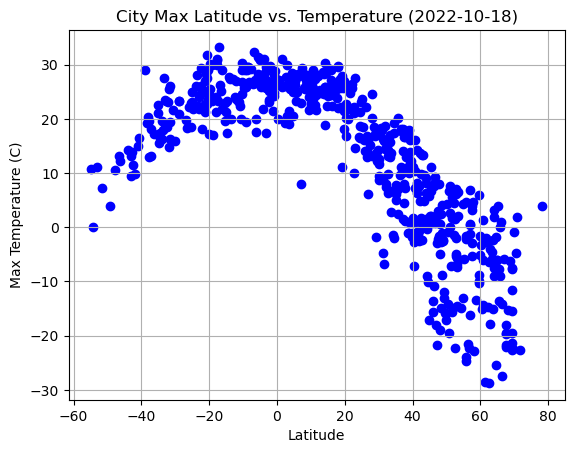

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

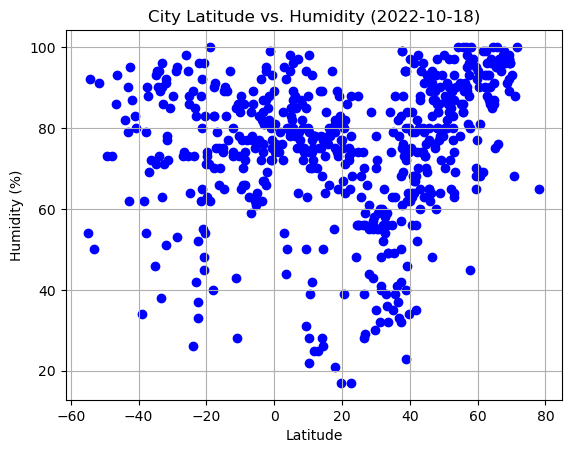

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color ='blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

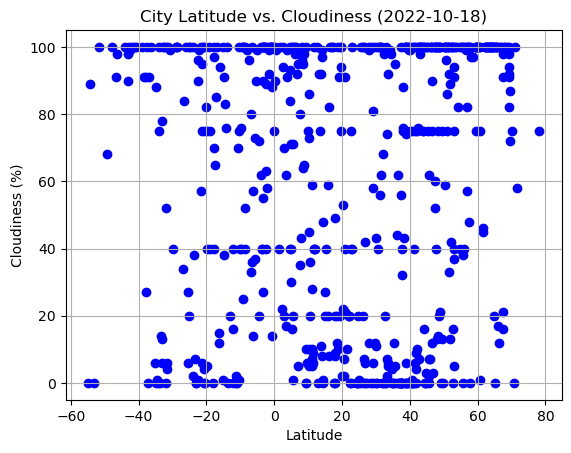

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color ='blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

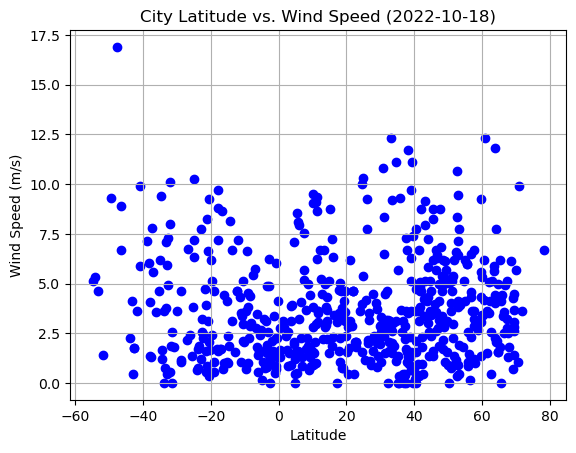

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color ='blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_reg(x_values,y_values, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    print(f"R squared: {rvalue**2}")
    
    plt.show()



In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Weather Description
City_ID,,,,,,,,,
5,bilibino,68.0546,166.4372,-15.21,96,100,1.81,RU,overcast clouds
11,nantucket,41.2835,-70.0995,8.08,68,100,6.69,US,overcast clouds
13,cabo san lucas,22.8909,-109.9124,27.56,74,40,1.79,MX,scattered clouds
14,badger,64.8000,-147.5333,-6.07,91,100,1.54,US,overcast clouds
15,northam,51.0333,-4.2167,7.56,80,86,5.28,GB,overcast clouds


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Weather Description
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,74,40,4.63,CC,scattered clouds
1,port elizabeth,-33.9180,25.5701,16.29,94,75,0.00,ZA,broken clouds
2,edinburgh of the seven seas,-37.0676,-12.3116,13.09,69,91,5.56,SH,overcast clouds
3,puerto natales,-51.7236,-72.4875,7.22,91,100,1.40,CL,light rain
4,papatowai,-46.5619,169.4708,13.14,86,91,8.91,NZ,overcast clouds


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Max Temp']
y_label = 'Max Temp'

linear_reg(x_values,y_values, y_label)

In [ ]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Max Temp']
y_label = 'Max Temp'

linear_reg(x_values,y_values, y_label)

**Discussion about the linear relationship:** The closer the latitude is to 0 in both hemispheres, the higher the max temperature will be. However, the trend line is clearer in the nothern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.11286497143384865


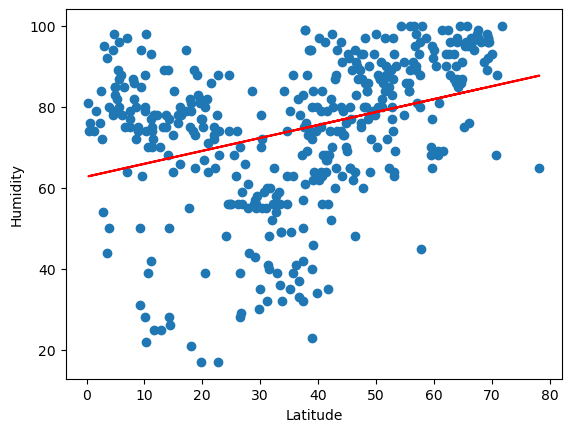

In [16]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Humidity']
y_label = 'Humidity'

linear_reg(x_values,y_values, y_label)

R squared: 0.0007254918226589222


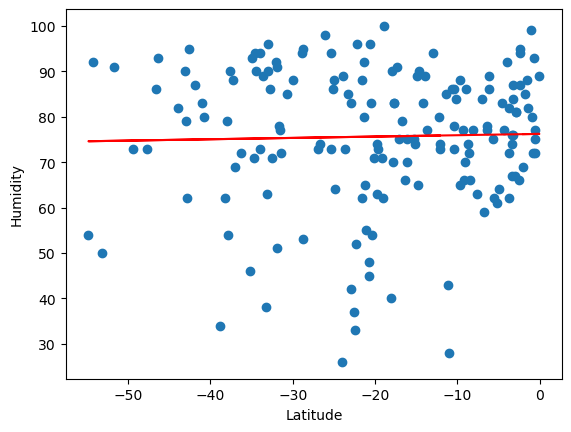

In [17]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Humidity']
y_label = 'Humidity'

linear_reg(x_values,y_values, y_label)

**Discussion about the linear relationship:** Humidity levels are not closely correlated with latitude in either the northern or southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.05777306899653303


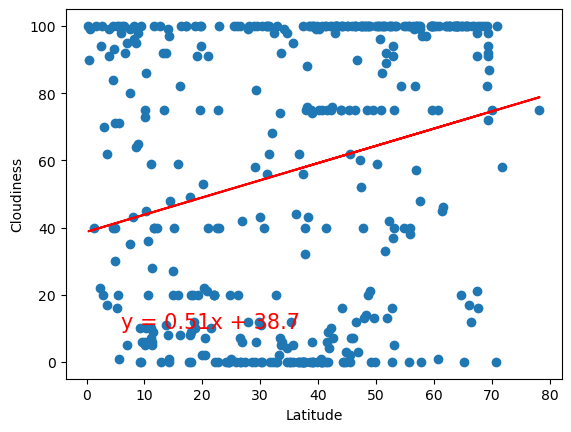

In [18]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Cloudiness']
y_label = 'Cloudiness'

linear_reg(x_values,y_values, y_label)

R squared: 0.0014141032803139336


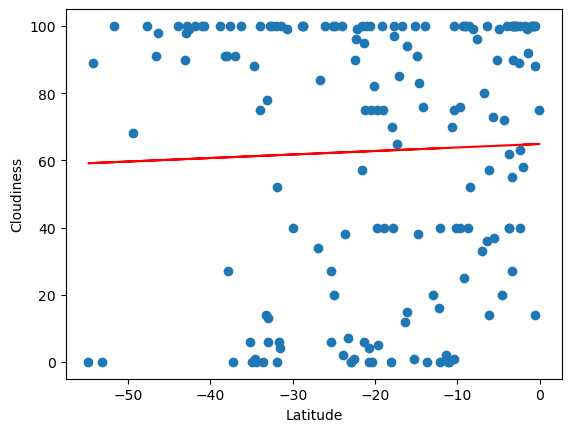

In [19]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Cloudiness']
y_label = 'Cloudiness'

linear_reg(x_values,y_values, y_label)

**Discussion about the linear relationship:** There is a slight correlation between cloudiness and latitude. However, it appears that this relationship varies from the northern to the southern hemisphere. The nothern hemisphere is less cloudy closer to 0 latitude, whereas the southern hemisphere becomes more cloudy the closer is approaches 0 latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.011087542622314888


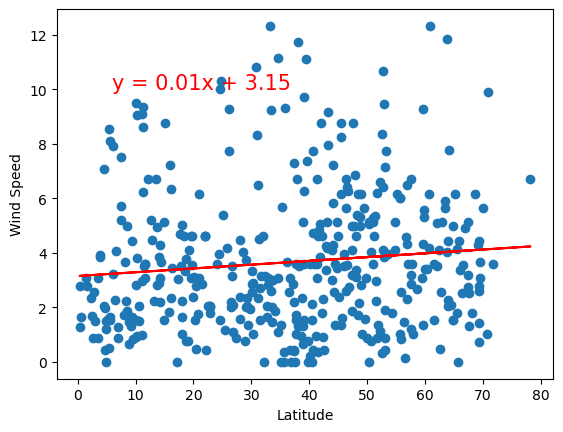

In [20]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Wind Speed']
y_label = 'Wind Speed'

linear_reg(x_values,y_values, y_label)

R squared: 0.10014964064742654


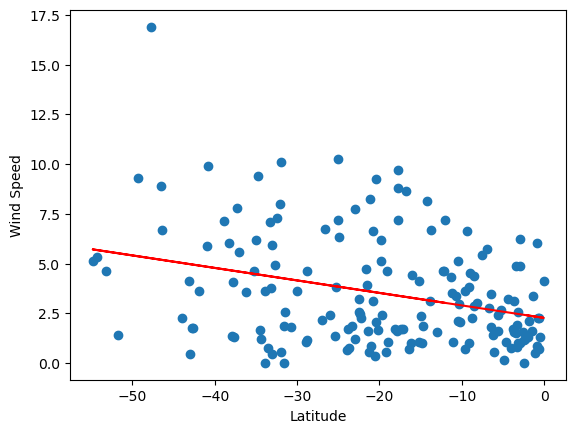

In [21]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Wind Speed']
y_label = 'Wind Speed'

linear_reg(x_values,y_values, y_label)

**Discussion about the linear relationship:** Wind speed and latitude have a fairly weak correlation in the nothern hemisphere, with a slight correlation between the higher latitudes and increased wind. There is a stronger correlation in the southern hemisphere that wind speed increases as it approaches 0 latitude.